# BM 336027 - Technion - Medical Image Processing


## Homework 3 - Image interpolation, Fourier domain operation and registration.
---

### <a style='color:red'> Due Date: 2.6.2022 </a>

---

### Agenda

* [Exercise 0: Phase and amplitude ](#Exercise-0)
* [Exercise 1: Phase correlation ](#Exercise-1)
* [Exercise 2: Image transformation and interpolation ](#Exercise-2)


#### Use as many cells as you need

---
### Students Information

* Fill in


|           Name |          Id |                               email |
|----------------|-------------|------------------------------------ |
|  [Daria Hasin] | [316398551] | [daria.hasin@campus.technion.ac.il] |

### Submission Guidelines
---
* **No handwritten submissions.** 
* What you have to submit:
    * You should submit this file only, with the name: `bm_hw3_id.ipynb`.
    * No other file-types (`.py`, `.docx`...) will be accepted.
* Submission on the course website (Moodle).

In [1]:
# imports you will need
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.data import camera, coffee
from typing import Tuple
%matplotlib inline

---

### **Assignment Instructions**
**In this assignment, you are allowed to use only basic numpy and matplotlib functions, and functions you implemented in other sections of the exercises (unless otherwise instructed)**

---

### Exercise 0

1. In class, you learned about the importance of Fourier transform components. Recreate the figures you saw in class using the two images 'camera' and 'coffee'.<br>
    Load the images by calling the two functions with the same name imported from the skimage.data library. Note that you might need to transform the image from RGB to gray; you may use the function rgb2gray of skimage.color library that was imported in the first code block. <br>
    Crop the center of both images to the size 400x400.<br>
    Compute their Fourier transform and create two new images, one whose Fourier transform is made of the frequency magnitudes of the image 'coffee' and the frequency phases of 'camera' and vice versa.<br> 
    Display the images in one figure and add titles.

In [2]:
# ====== YOUR CODE: ======
def crop_img(img, size):
    img_trim_row = int((img.shape[0]-size)/2)
    img_trim_col = int((img.shape[1]-size)/2)
    is_zero = 0
    
    if img_trim_row == 0:
        is_zero = 1
        cropped_img = img[img_trim_row:, img_trim_col:-img_trim_col]
        
    if img_trim_col == 0:
        is_zero = 1
        cropped_img = img[img_trim_row:-img_trim_row, img_trim_col:]
        
    if is_zero == 0:
        cropped_img = img[img_trim_row:-img_trim_row, img_trim_col:-img_trim_col]
        
    return cropped_img
# ========================   

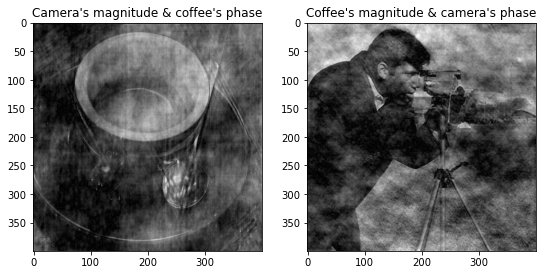

In [3]:
# ====== YOUR CODE: ======
# camera image
size = 400
camera_img = camera()
cropped_camera = crop_img(camera_img, size)

camera_fft = np.fft.fft2(cropped_camera)
camera_magnitude = abs(camera_fft)
camera_phase = np.angle(camera_fft)

# coffee image
coffee_img = rgb2gray(coffee())
cropped_coffee = crop_img(coffee_img, size)

coffee_fft = np.fft.fft2(cropped_coffee)
coffee_magnitude = abs(coffee_fft)
coffee_phase = np.angle(coffee_fft)


# new images
new_img1_fft = camera_magnitude*np.exp(coffee_phase*1j)
new_img2_fft = coffee_magnitude*np.exp(camera_phase*1j)

new_img1 = np.fft.ifft2(new_img1_fft)
new_img2 = np.fft.ifft2(new_img2_fft)


plt.figure(figsize=(9,9))

plt.subplot(121)
plt.imshow(abs(new_img1), cmap= 'gray')
plt.title("Camera's magnitude & coffee's phase")

plt.subplot(122)
plt.imshow(abs(new_img2), cmap= 'gray')
plt.title("Coffee's magnitude & camera's phase")

plt.show()
# ========================   

2.  Create an image whose Fourier transform is made of the frequency magnitude of random values and the frequency phases of one of the images above (camera or coffee). Display the image and add title. 

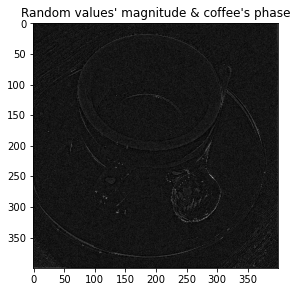

In [4]:
# ====== YOUR CODE: ======
rand_vals = np.random.rand(size, size)
rand_vals_magnitude = abs(np.fft.fft2(rand_vals))

new_img3_fft = rand_vals_magnitude*np.exp(coffee_phase*1j)
new_img3 = np.fft.ifft2(new_img3_fft)

plt.figure(figsize=(4.5,4.5))
plt.imshow(abs(new_img3), cmap= 'gray')
plt.title("Random values' magnitude & coffee's phase")

plt.show()
# ========================   

---

###  Exercise 1

In this exercise, you will implement a registration algorithm based on the Fourier transform, called phase correlation.<br> 
The phase correlation method is based on the Fourier shift theorem and is used to find the translation between two images.<br>
1. First, we want to get the magnitude and phase of the Fourier transform of the images. Implement the `fft_r_theta` function. The function should compute the FFT transform of the image and return two arrays; the first is the signal magnitude, and the second is the phase. Write a description of your function and explain its inputs and output.  

In [5]:
def fft_r_theta(img: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    '''
     
    The function computes the FFT transform of the image the signal magnitude and the phase.
    
    :param img: numpy array of an image.
    :return r: numpy array of the signal magnitude.
    :return theta: numpy array of the signal phase.
    '''
    # ====== YOUR CODE: ======
    img_fft = np.fft.fft2(img)
    r = abs(img_fft)
    theta = np.angle(img_fft)
    
    # ========================
    return r, theta

2. Load the images 'template.png' and 'moving.png' and compute their difference. <br>
    Display in one figure for each image (template, moving and the difference) the original image, its log magnitude and phase of their Fourier transform (3x3 grid of images). Add titles to your images.   

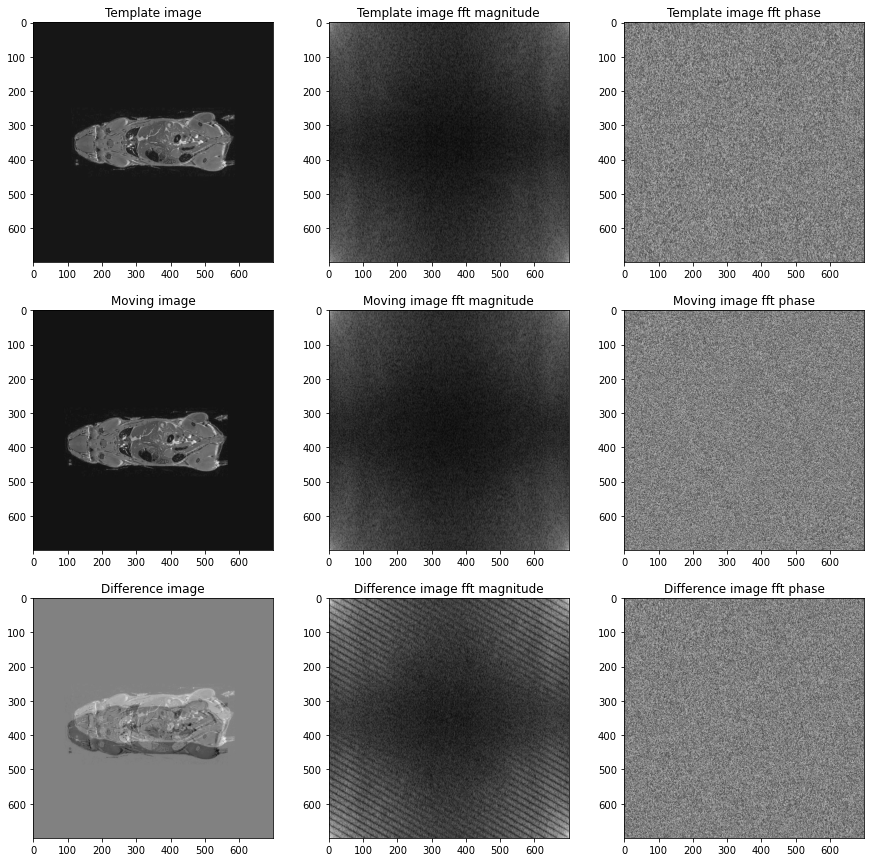

In [6]:
# ====== YOUR CODE: ======
template_img = plt.imread(r'images/template.png')
template_mag, template_phase = fft_r_theta(template_img)

moving_img = plt.imread(r'images/moving.png')
moving_mag, moving_phase = fft_r_theta(moving_img)

difference = template_img-moving_img
difference_mag, difference_phase = fft_r_theta(difference)


plt.figure(figsize=(15,15))

plt.subplot(331)
plt.imshow(template_img, cmap='gray')
plt.title('Template image')
plt.subplot(332)
plt.imshow(np.log(template_mag+1), cmap='gray') 
plt.title('Template image fft magnitude')
plt.subplot(333)
plt.imshow(template_phase, cmap='gray')
plt.title('Template image fft phase')


plt.subplot(334)
plt.imshow(moving_img, cmap='gray')
plt.title('Moving image')
plt.subplot(335)
plt.imshow(np.log(moving_mag+1), cmap='gray') 
plt.title('Moving image fft magnitude')
plt.subplot(336)
plt.imshow(moving_phase, cmap='gray') 
plt.title('Moving image fft phase')

plt.subplot(337)
plt.imshow(difference, cmap='gray') 
plt.title('Difference image')
plt.subplot(338)
plt.imshow(np.log(difference_mag+1), cmap='gray') 
plt.title('Difference image fft magnitude')
plt.subplot(339)
plt.imshow(difference_phase, cmap='gray') 
plt.title('Difference image fft phase')

plt.show()
# ========================

Now, we want to find the translation between the two images and the required correction.<br>
Based on the Fourier shift theorem, we can express the images $f_1,f_2$ as follows:
    
$$
f_2(x,y)=f_1(x-t_x,y-t_y)\\
F_2(u,v)=e^{-2j\pi(ut_x+vt_y)}F_1(u,v)
$$

where $t_x, t_y$ represent the translation and $F_1,F_2$ are the Fourier transforms of the images $f_1,f_2$ respectivly.<br> 

The translation between two images $f_1,f_2$ can be found using the normalized cross power spectrum (CPS): 
$$
e^{-2j\pi(ut_x+vt_y)}=\frac{F_1(u,v)F^*_2(u,v)}{|F_1(u,v)F^*_2(u,v)|}
$$
where $F^*_2$ is the complex conjugate of $F_2$


The term $e^{-2j\pi(ut_x+vt_y)}$ is the Fourier transform of the shifted Dirac delta function. Hence, we can calculate $t_x,t_y$ by computing the inverse Fourier transform of the CPS and finding the location of the peak.


2. Implement the function `phase_correlation` that gets two images and returns the translation between them in the x and y axes, and the reconstructed image (the moving image after the required shifting). Write a description of your function and explain its inputs and output.

In [7]:
def phase_correlation(img1: np.ndarray, img2: np.ndarray)-> Tuple[int, int, np.ndarray]:
    '''
    The function gets two images and returns the translation between them and the reconstructed image.
    
    :param img1: numpy array of an image.
    :param img2: numpy array of an image.
    :return res_dx: the translation between the images in the x axis (int).
    :return res_dy: the translation between the images in the y axis (int).
    :return corr_img: numpy array of the reconstructed image (the moving image after the required shifting).
    '''
    # ====== YOUR CODE: ======
    img1_fft = np.fft.fft2(img1)
    img2_fft = np.fft.fft2(img2)
    
    img2_fft_conj = np.conjugate(img2_fft)
    
    cps = (img1_fft*img2_fft_conj)/abs(img1_fft*img2_fft_conj)
    corr_img = np.fft.ifft2(cps*img2_fft)
    
    cps_ifft = np.fft.ifft2(cps)
    cps_ifft_peak = np.argwhere(cps_ifft == cps_ifft.max())
    res_dy = cps_ifft.shape[0] - cps_ifft_peak[0][0]
    res_dx = cps_ifft_peak[0][1]
    
    # ======================== 
    return res_dx, res_dy, corr_img

3. Find the translation between the tamplate image and the moving image and the reconstructed image using the  `phase_correlation`.<br>
    Print the translation in the x and y axes and display in one figure the moving image, the reconstructed image and the difference between the template image and the reconstructed image. Add titles.  

The translation in the x axis is 20 and in the y axis is 35.


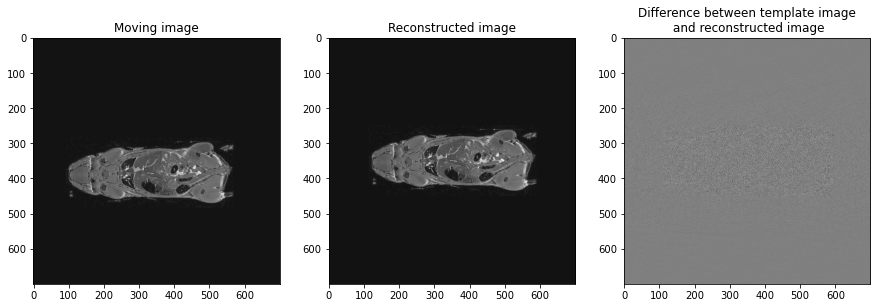

In [8]:
# ====== YOUR CODE: ======
tx, ty, recon_img = phase_correlation(template_img, moving_img)
print(f'The translation in the x axis is {tx} and in the y axis is {ty}.')

plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow(moving_img, cmap='gray')
plt.title('Moving image')

plt.subplot(132)
plt.imshow(abs(recon_img), cmap='gray')
plt.title('Reconstructed image')

plt.subplot(133)
plt.imshow(template_img - abs(recon_img), cmap='gray')
plt.title('Difference between template image\n and reconstructed image')

plt.show()
# ======================== 

4. The peak signal to noise ratio, or PSNR, is a metric of image quality.
$$ PSNR = 20*log_{10}\left(\frac{I_{max}}{\sqrt{\sigma^2}}\right) $$
Where $I_{max}$ is the maximal image value and $\sigma^2$ is the variance of the noise in the image.
The images provided to you have no noise in them. Add normally distributed noise to both images such that the PSNR will be 25. Now use your algorithm on the noisy images (template and moving) and try to match them again.  <br>
Display in one figure the moving image, the reconstructed image and the difference between the template image and the reconstructed image. Add titles.  

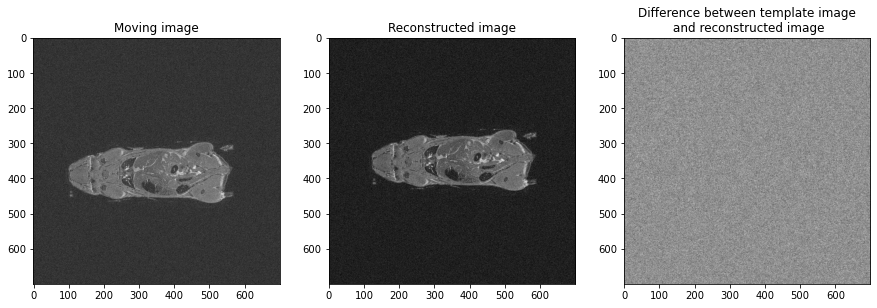

In [9]:
# ====== YOUR CODE: ======
wanted_pnsr = 25

i_max_template = np.max(template_img)
sigma_squered_template = i_max_template/(10**(wanted_pnsr/20))
noise_template = np.random.normal(0, sigma_squered_template, template_img.shape)
noisy_template_img = template_img + noise_template

i_max_moving = np.max(moving_img)
sigma_squered_moving = i_max_moving/(10**(wanted_pnsr/20))
noise_moving = np.random.normal(0, sigma_squered_moving, moving_img.shape)
noisy_moving_img = moving_img + noise_moving

tx, ty, recon_img_noisy = phase_correlation(noisy_template_img, noisy_moving_img)

plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow(noisy_moving_img, cmap='gray')
plt.title('Moving image')

plt.subplot(132)
plt.imshow(abs(recon_img_noisy), cmap='gray')
plt.title('Reconstructed image')

plt.subplot(133)
plt.imshow(noisy_template_img - abs(recon_img_noisy), cmap='gray')
plt.title('Difference between template image\n and reconstructed image')

plt.show()

# ======================== 

5. Repeat the previous task for different levels of PSNR until you find the lowest PSNR for which your algorithm works.

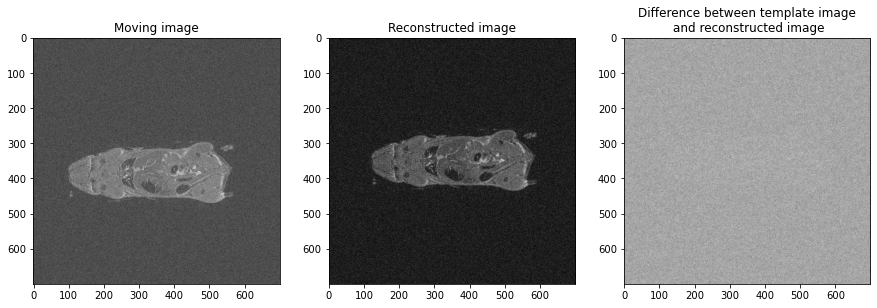

In [10]:
# ====== YOUR CODE: ======
wanted_pnsr = 20

i_max_template = np.max(template_img)
sigma_squered_template = i_max_template/(10**(wanted_pnsr/20))
noise_template = np.random.normal(0, sigma_squered_template, template_img.shape)
noisy_template_img = template_img + noise_template

i_max_moving = np.max(moving_img)
sigma_squered_moving = i_max_moving/(10**(wanted_pnsr/20))
noise_moving = np.random.normal(0, sigma_squered_moving, moving_img.shape)
noisy_moving_img = moving_img + noise_moving

tx, ty, recon_img_noisy = phase_correlation(noisy_template_img, noisy_moving_img)

plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow(noisy_moving_img, cmap='gray')
plt.title('Moving image')

plt.subplot(132)
plt.imshow(abs(recon_img_noisy), cmap='gray')
plt.title('Reconstructed image')

plt.subplot(133)
plt.imshow(noisy_template_img - abs(recon_img_noisy), cmap='gray')
plt.title('Difference between template image\n and reconstructed image')

plt.show()

# ========================

---

### Exercise 2

In this exercise, you will implement image transformations and pixel value interpolation.<br>
1. Implement the function `back_project` that recieves a 3x3 transformation matrix (source to destination) and a destination image size as a tuple $(h, w)$ and returns the coordinates of the transformed destination pixels in the source image $(h, w, 2)$.   
Write a description of your function and explain its inputs and output.

In [11]:
def back_project(mapping: np.ndarray, size: tuple) -> np.ndarray:
    '''
    The function recives source to destination transformation matrix and a destination image's size
    and returns the coordinates of the transformed destination pixels in the source image.
    
    :param mapping: 3 by 3 numpy array of an source to destination transformation matrix.
    :param size: tuple of a destination image size (h, w).
    :return source_coords: numpy array of the coordinates of the transformed destination pixels in the source 
                            image (h, w, 2)
    '''
    # ====== YOUR CODE: ======
    h, w = size
    source_coords = np.zeros((h, w, 2))    
    for i in range(h):
        for j in range(w):
            source_coords[i, j, 0] = i*mapping[0, 0] + j*mapping[0, 1] + mapping[0, 2]
            source_coords[i, j, 1] = i*mapping[1, 0] + j*mapping[1, 1] + mapping[1, 2]
            
    # ========================
    return source_coords

2. Implement the function `general_rotation_matrix` that recieves a rotation angle and the center of rotations and creates a transformation for a rotation about the given center (y, x).    
Write a description of your function and explain its inputs and output.

In [12]:
def general_rotation_matrix(degree: float, center: np.ndarray) -> np.ndarray:
    '''
    The function  recieves a rotation angle and the center of rotations 
    and creates a transformation for a rotation about the given center (y, x).
    
    :param degree: rotation angle in radians
    :param center: numpy array of a center (x, y).
    :return rotate_mat: a numpy array of rotation transformation around the center.
    '''
    # ====== YOUR CODE: ======
    rotate_mat_origin = np.array([[np.cos(degree), -np.sin(degree), 0], [np.sin(degree), np.cos(degree), 0], [0, 0, 1]])
    rotate_mat = np.array([[1, 0, center[0]], [0, 1, center[1]], [0, 0, 1]]) @ rotate_mat_origin @ np.array([[1, 0, -center[0]], [0, 1, -center[1]], [0, 0, 1]])
#     rotate_mat = rotate_mat_origin
    # ========================
    return rotate_mat

3. Now that we have the positions of the transformed pixels in the source image, we can compute their values using interpolation.<br>
Implement the function `bilinear_interpolation` that receives the source image and an array with the shape $[h, w, 2]$ that contains the subpixel coordinates of the transformed pixels and computes their values using bilinear interpolation.<br>
Write a description of your function and explain its inputs and output.

In [13]:
def bilinear_interpolation(source: np.ndarray, coords: np.ndarray) -> np.ndarray:
    '''
    The function eceives a source image and an array that contains the subpixel coordinates 
    of the transformed pixels and computes their values using bilinear interpolation.
    
    :param source: numpy array of an image.
    :param coords: numpy array (h, w, 2) of coordinates of transformed pixels.
    :return interpolation: numpy array of an interpolated image.
    '''
    # ====== YOUR CODE: ======
    orig_i, orig_j = source.shape
    new_i, new_j, _ = coords.shape
    
    interpolation = np.zeros((new_i, new_j))
    
    for i in range(new_i):
        for j in range(new_j):
            x = coords[i, j][0]
            y = coords[i, j][1]
            
            x_floor = np.int64(np.floor(x))
            if x_floor >= orig_i:
                x_floor = orig_i-1
            if x_floor < 0:
                x_floor = 0
                
            y_floor = np.int64(np.floor(y))
            if y_floor >= orig_j:
                y_floor = orig_j-1
            if y_floor < 0:
                y_floor = 0 
            
            x_ceil = np.int64(np.ceil(x))
            if x_ceil >= orig_i:
                x_ceil = orig_i-1
            if x_ceil < 0:
                x_ceil = 0 
                
            y_ceil = np.int64(np.ceil(y))
            if y_ceil >= orig_j:
                y_ceil = orig_j-1
            if y_ceil < 0:
                y_ceil = 0 
            
            neighbor_ul = source[x_floor, y_floor]
            neighbor_ur = source[x_ceil, y_floor]
            neighbor_dl = source[x_floor, y_ceil]
            neighbor_dr = source[x_ceil, y_ceil]
            
            up = neighbor_ul*(x_ceil-x) + neighbor_ur*(x-x_floor)
            down = neighbor_dl*(x_ceil-x) + neighbor_dr*(x-x_floor)
            value = up*(y_ceil-y) + down*(y-y_floor)
            
            interpolation[i, j] = value
    # ========================        
    return interpolation

Run this block to get an example image from scipy.    
Don't forget to adjust it according to your needs.

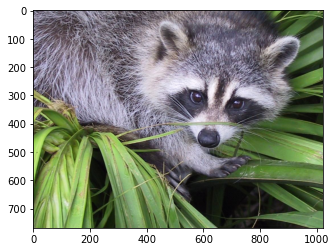

In [14]:
from scipy import misc
import matplotlib.pyplot as plt


f= misc.face()
plt.imshow(f)
plt.show()


4. Use your functions to create 4 different rotation matrices (4 different angles and 4 different rotation canters).    
Plot the image rotated using each rotation matrix.   
Add a title to each figure specifying the rotation angle and the center of rotation.

In [ ]:
# ====== YOUR CODE: ======
gs_f = rgb2gray(f)
row, col = gs_f.shape

degrees = [np.pi/4, np.pi/8, np.pi/5, -np.pi/4]
centers = [[row/2, col/2], [row/4, col/4], [row/2, col/4], [row/4, col/2]]
plt.figure(figsize=(9,9))

for idx, degree in enumerate(degrees):
    center = centers[idx]
    rotate_mat = general_rotation_matrix(degree, center)
    coords = back_project(rotate_mat, (row, col))
    interpolated_img = bilinear_interpolation(gs_f, coords)
    
    plt.subplot(2, 2, idx+1)
    plt.imshow(interpolated_img, cmap='gray')
    plt.title(f'Degree={degree*180/np.pi}, center={center}')

plt.show()

# ======================== 

**Questions:**

5. After applying a sequence of basic affine transformations on the left image, we received the right image. Which affine transformations were applied, and in what order? Write the matrix representation of the transformations.  

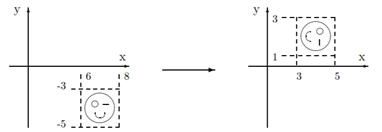   





**Answer:**

The affine transformations that were applied are: rotation in $\theta = \frac{\pi}{2}$ and translation of $t_x = -3$ and $t_y = 4$. In this case the order doesn't matter.

rotation matrix = 
$\begin{pmatrix}
0 & -\frac{1}{2} & 0\\
\frac{1}{2} & 0 & 0\\
0 & 0 & 1
\end{pmatrix} $
<br>
<br>

translation matrix = 
$\begin{pmatrix}
1 & 0 & -3\\
0 & 1 & 4\\
0 & 0 & 1
\end{pmatrix} $

6. To rotate the original image (1), we used nearest neighbor interpolation and bilinear linear interpolation (images 2,3). What interpolation was used in each image (2,3). Explain how you reached that conclusion.      
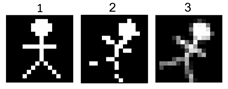    


**Answer:**

**Image 2 -> nearest neighbor interpolation** <br>
We can see that there are "missing" (background) pixels in this image due to the nature of this interpolation. <br>
We can see it expecially in the edges or thin parts like the hands and legs of the figure because nearest neighbor interpolatio rounds the inbetween pixels to the nearest one - this way we lose information.
<br>
<br>
**Image 3 -> bilinear interpolation** <br>
We can see that there are white-gray pixels in the edges, that indicates bilinear interpolation. <br>
With this interpolation we get weighted pixels from the neighbors of the wanted pixel. The weigths depend on the distance of the neighbors from the wanted pixel.